In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.drop(['FLAG_MOBIL'], axis=1, inplace=True)
train.fillna('BaekSu', inplace=True) 

test.drop(['FLAG_MOBIL'], axis=1, inplace=True)
test.fillna('BaekSu', inplace=True)


In [4]:
train = train[train['family_size'] <= 7]

In [5]:
#train.set_index('index', inplace=True)
train = train.reset_index(drop=True)

In [6]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,BaekSu,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0
26447,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,BaekSu,2.0,-47.0,2.0
26448,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0
26449,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0


In [31]:
# train.loc[(train.income_type=='Student'), 'income_type'] = 'Pensioner'
# test.loc[(test.income_type=='Student'), 'income_type'] = 'Pensioner'

In [32]:
# train['YEARS_EMPLOYED'] = round(train['DAYS_EMPLOYED']/365, 5)
# train['YEARS_BIRTH'] = round(train['DAYS_BIRTH']/365, 5)

# test['YEARS_EMPLOYED'] = round(test['DAYS_EMPLOYED']/365, 5)
# test['YEARS_BIRTH'] = round(test['DAYS_BIRTH']/365, 5)

In [33]:
# train.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)
# train.drop(['DAYS_BIRTH'], axis=1, inplace=True)

# test.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)
# test.drop(['DAYS_BIRTH'], axis=1, inplace=True)

In [34]:
# train["DAYS_EMPLOYED"][train["DAYS_EMPLOYED"] >0] = train["DAYS_EMPLOYED"][train["DAYS_EMPLOYED"] >0].replace(365243, 0)
# train["DAYS_EMPLOYED"][train["DAYS_EMPLOYED"] >0]

# test["DAYS_EMPLOYED"][test["DAYS_EMPLOYED"] >0] = test["DAYS_EMPLOYED"][test["DAYS_EMPLOYED"] >0].replace(365243, 0)
# test["DAYS_EMPLOYED"][test["DAYS_EMPLOYED"] >0]

In [7]:
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    train[feat]=-train[feat]  
    test[feat]=-test[feat]

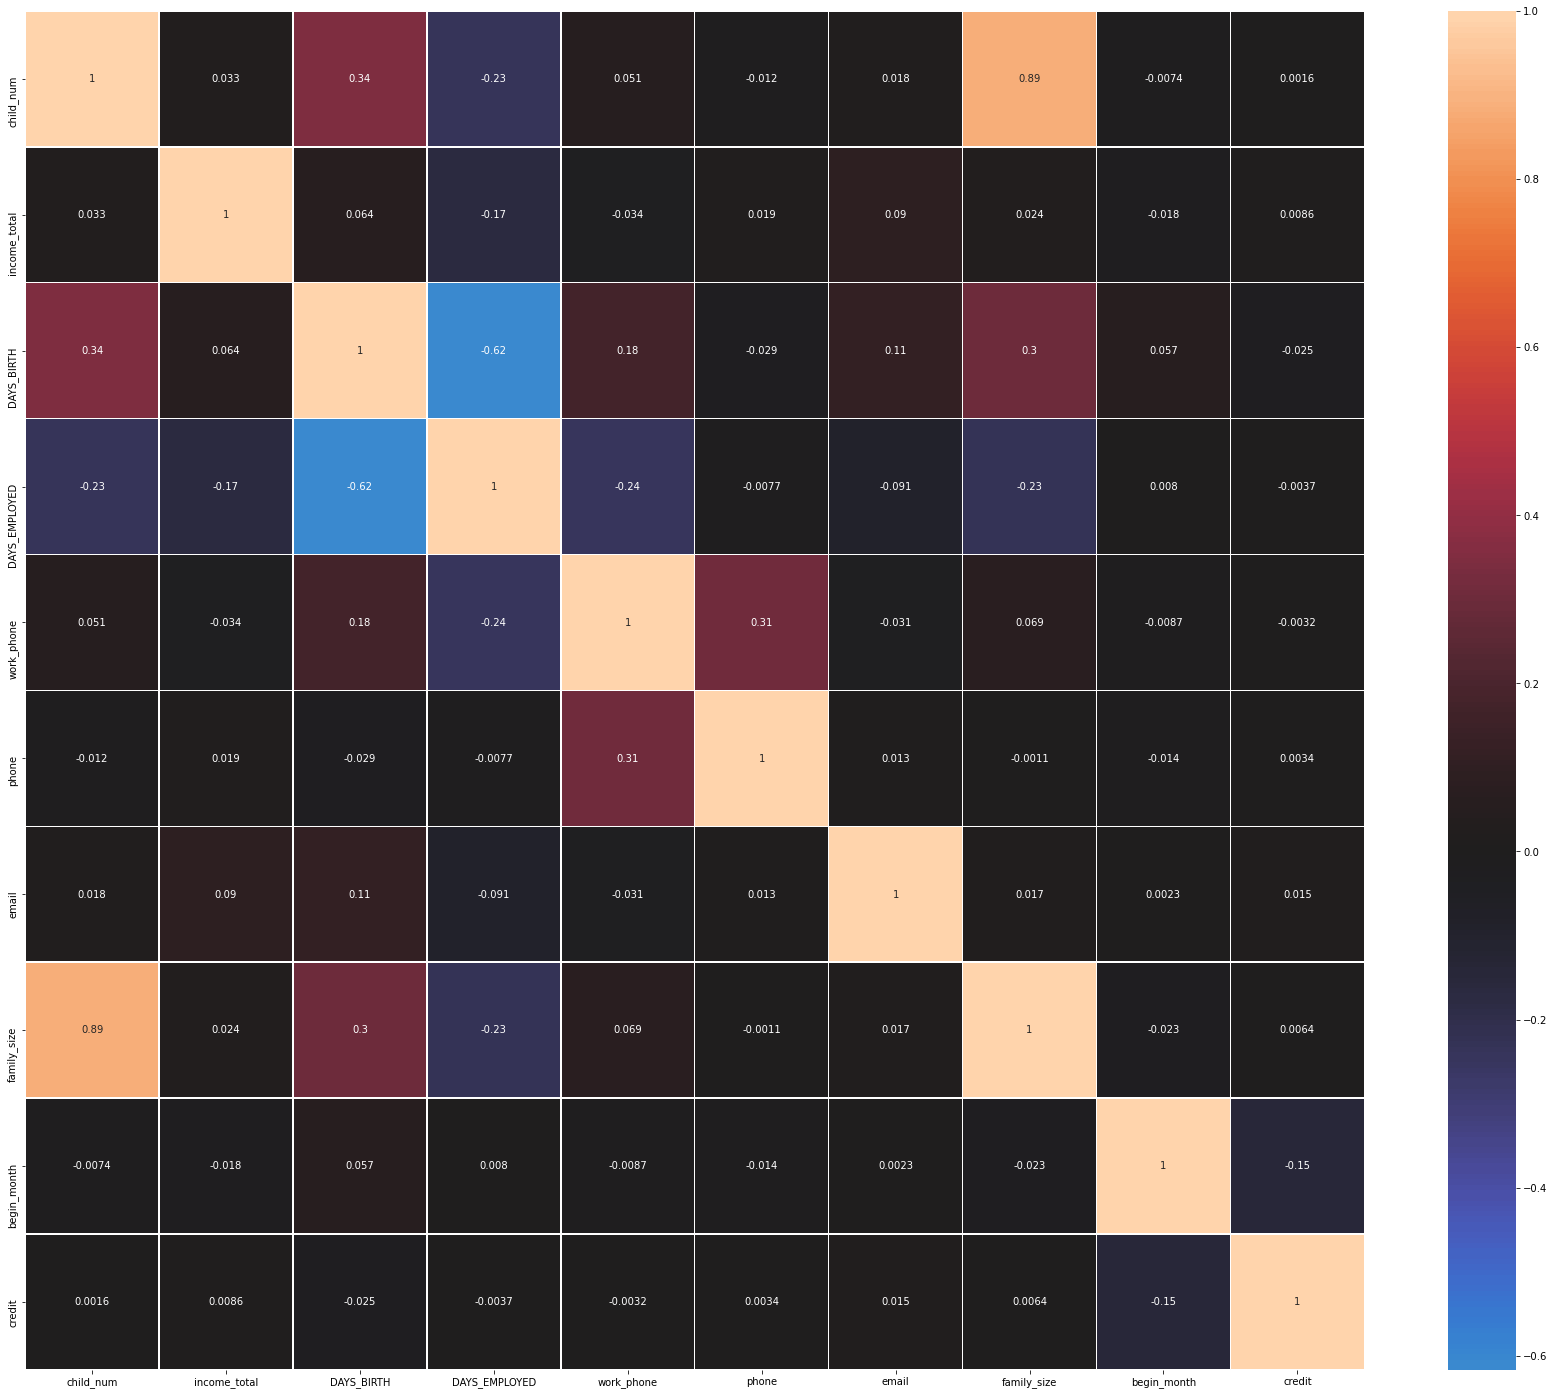

In [53]:
train_corr = train.corr()
ax = plt.subplots(figsize=(30, 25))
ax = sns.heatmap(train_corr, center=0, annot = True, linewidths=.5)

In [9]:
for df in [train,test]:
    df['DAYS_BIRTH_DAYS_EMPLOYED_ratio'] = df['DAYS_BIRTH'] / df['DAYS_EMPLOYED']
    df['income_total_DAYS_BIRTH_ratio'] = df['income_total'] / df['DAYS_BIRTH']
    df['income_total_DAYS_EMPLOYED_ratio'] = df['income_total'] / df['DAYS_EMPLOYED']
    df['parents'] = df['family_size'] - df['child_num']
    df['Workingdays'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
    df['income_total_workingday_ratio'] = df['income_total'] / df['Workingdays']
    #df['income_total_family_size_ratio'] = df['income_total'] / df['family_size']

In [11]:
categorical_feats

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

In [62]:
# le = LabelEncoder()
# for df in [train,test]:
#     df['gender'] = le.fit_transform(df['gender'].astype(str))
#     df['car'] = le.fit_transform(df['car'].astype(str))
#     df['reality'] = le.fit_transform(df['reality'].astype(str))
#     df['income_type'] = le.fit_transform(df['income_type'].astype(str))
#     df['edu_type'] = le.fit_transform(df['edu_type'].astype(str))
#     df['family_type'] = le.fit_transform(df['family_type'].astype(str))
#     df['house_type'] = le.fit_transform(df['house_type'].astype(str))
#     df['family_type'] = le.fit_transform(df['family_type'].astype(str))
#     df['occyp_type'] = le.fit_transform(df['occyp_type'].astype(str))

In [12]:
# train_corr = train.corr()
# ax = plt.subplots(figsize=(30, 25))
# ax = sns.heatmap(train_corr, center=0, annot = True, linewidths=.5)

### ID생성 / 중복컬럼 제거

In [158]:
# train['ID'] = \
# train['child_num'].astype(str) + '_' + train['income_total'].astype(str) + '_' +\
# train['DAYS_BIRTH'].astype(str) + '_' + train['DAYS_EMPLOYED'].astype(str) + '_' +\
# train['work_phone'].astype(str) + '_' + train['phone'].astype(str) + '_' +\
# train['email'].astype(str) + '_' + train['family_size'].astype(str) + '_' +\
# train['gender'].astype(str) + '_' + train['car'].astype(str) + '_' +\
# train['reality'].astype(str) + '_' + train['income_type'].astype(str) + '_' +\
# train['edu_type'].astype(str) + '_' + train['family_type'].astype(str) + '_' +\
# train['house_type'].astype(str) + '_' + train['occyp_type'].astype(str)

# test['ID'] = \
# test['child_num'].astype(str) + '_' + test['income_total'].astype(str) + '_' +\
# test['DAYS_BIRTH'].astype(str) + '_' + test['DAYS_EMPLOYED'].astype(str) + '_' +\
# test['work_phone'].astype(str) + '_' + test['phone'].astype(str) + '_' +\
# test['email'].astype(str) + '_' + test['family_size'].astype(str) + '_' +\
# test['gender'].astype(str) + '_' + test['car'].astype(str) + '_' +\
# test['reality'].astype(str) + '_' + test['income_type'].astype(str) + '_' +\
# test['edu_type'].astype(str) + '_' + test['family_type'].astype(str) + '_' +\
# test['house_type'].astype(str) + '_' + test['occyp_type'].astype(str)

In [160]:
# ID : 기존에 있는 아이디면 그대로 인코딩, 없으면 -1로 인코딩
# le = LabelEncoder()
# train['ID'] = le.fit_transform(train['ID'])
# test.loc[~test['ID'].isin(le.classes_),'ID'] = -1
# test.loc[test['ID'].isin(le.classes_),'ID'] = le.transform(test['ID'][test['ID'].isin(le.classes_)])

In [162]:
# test = test.astype({'ID': 'int32'})

In [163]:
# target = 'credit'
# income_type_mean = train.groupby('income_type')[target].mean()
# train['income_type_mean'] = train['income_type'].map(income_type_mean)
# test['income_type_mean'] = test['income_type'].map(income_type_mean)

In [164]:
# open_month = pd.DataFrame(train.groupby('ID')['begin_month'].min(), index=train.groupby('ID')['begin_month'].min().index)
# open_month= open_month.astype('int')
# open_month.columns = ['open_month']
# om_dict = open_month.open_month.to_dict()

# train['open_month'] = train["ID"]
# train['open_month'] = train['open_month'].map(om_dict)

In [165]:
# open_month = pd.DataFrame(test.groupby('ID')['begin_month'].min(), index=test.groupby('ID')['begin_month'].min().index)
# open_month= open_month.astype('int')
# open_month.columns = ['open_month']
# om_dict = open_month.open_month.to_dict()

# test['open_month'] = test["ID"]
# test['open_month'] = test['open_month'].map(om_dict)

In [166]:
#train.sort_values(by=['index'], axis=0, inplace=True, ignore_index=True)
#test.sort_values(by=['index'], axis=0, inplace=True, ignore_index=True)

In [167]:
#train.drop(['ID'], axis=1, inplace=True)
#test.drop(['ID'], axis=1, inplace=True)

In [168]:
#new_data=pd.DataFrame(train.groupby(["ID"])["begin_month"].agg(min))
#new_data

In [13]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
# numerical_feats.remove('ID')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

total_feats = numerical_feats + categorical_feats

Number of Numerical features:  16
Number of Categorical features:  8


## LabelEncoding, Scaling

In [14]:
for feat in categorical_feats:
    encoder = LabelEncoder()
    train[feat] = encoder.fit_transform(train[feat])
    test[feat] = encoder.transform(test[feat])

In [15]:
# for col in ['family_size', 'child_num']:
#     train[col] = np.log2(1 + train[col])
#     test[col] = np.log2(1 + test[col])

# feats = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

# scaler = MinMaxScaler()
# train[['DAYS_EMPLOYED']] = scaler.fit_transform(train[['DAYS_EMPLOYED']])
# test[['DAYS_EMPLOYED']] = scaler.transform(test[['DAYS_EMPLOYED']])


## Modeling

In [30]:
n_est = 1500
seed = 42
n_fold = 5
n_class = 3

rf_params = {
    'max_depth': 16,
    'min_samples_leaf': 8,
    'random_state': seed
}

lgb_params = {
    'metric': 'multi_logloss',
    'n_estimators': n_est,
    'objective': 'multiclass',
    'random_state': seed,
    'learning_rate': 0.01,
    'min_child_samples': 20,
    'reg_alpha': 3e-5,
    'reg_lambda': 9e-2,
    'num_leaves': 128,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'num_class': n_class,
    'early_stopping_rounds':500,
    'n_jobs':-1,
    'max_depth':-1,
}

# lgb_params = {
#                     'objective':'multiclass',
#                     'num_class': 3,
#                     'boosting_type':'gbdt',
#                     'metric':'multi_logloss',
                    
#                     'learning_rate':0.02,
#                     'num_leaves': 127,
                    
#                     'tree_learner':'serial',
#                     "min_child_weight": 0.01,
#                     'colsample_bytree': 0.7,
#                     'subsample_freq':1,
#                     'subsample':0.5,
#                     'n_estimators':100000,
#                     'max_bin':800,
#                     'verbose':-1,
#                     'seed': SEED,
#                     'early_stopping_rounds':300, 
#                 }

xgb_params = {
    'objective': 'multi:softprob',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'random_state': seed,
    'num_class': n_class,
    'max_depth': 6,
    'n_estimators': n_est,
    'reg_alpha': 3e-5,
    'reg_lambda': 9e-2,
}

In [32]:
models = {'RF': RandomForestClassifier(**rf_params), 
               'LGBM': LGBMClassifier(**lgb_params),
}

In [33]:
# X = train.drop('credit', axis=1)
# y = train['credit']
# X_test = test

In [34]:
target = 'credit'

In [35]:
train8, train2 = train_test_split(train, test_size=0.2, random_state=seed)

In [36]:
remove_features = []
remove_features += ['index' , 'credit']
features = [col for col in list(train) if col not in remove_features]
features

['gender',
 'car',
 'reality',
 'child_num',
 'income_total',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'family_size',
 'begin_month',
 'DAYS_BIRTH_DAYS_EMPLOYED_ratio',
 'income_total_DAYS_BIRTH_ratio',
 'income_total_DAYS_EMPLOYED_ratio',
 'parents',
 'Workingdays',
 'income_total_workingday_ratio']

In [52]:
def make_test(old_score = 0 , output =False):
    features_columns = [col for col in list(train8) if col not in remove_features]
    X_train, y_train = train8[features_columns], train8[target]    
    X_val, y_val = train2[features_columns], train2[target]
    
    tt_df = train2[['index',target]]        
    y_preds = np.zeros((train2.shape[0],3))
    
    tr_data = lgb.Dataset(X_train, label=y_train)
    vl_data = lgb.Dataset(X_val, label=y_val) 
    estimator = lgb.train(
            lgb_params,
            tr_data,
            valid_sets = [tr_data, vl_data],
            verbose_eval = 100,
        )
    y_preds += estimator.predict(X_val)
    feature_imp = pd.DataFrame(sorted(zip(estimator.feature_importance(),X_train.columns)), columns=['Value','Feature'])
    
    m_results = []
    print('#'*20)

    
    g_logloss = log_loss(tt_df[target], y_preds)
    score_diff = g_logloss - old_score
    print('Global log loss', g_logloss)
    m_results.append(g_logloss)
    
    print('#'*20)
    print('Features Preformance:', g_logloss)
    print('Diff with previous__:', score_diff)
    
    return tt_df, feature_imp, m_results, estimator ,g_logloss

In [53]:
tt_df, feature_imp, m_results, model ,g_logloss= make_test()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2104
[LightGBM] [Info] Number of data points in the train set: 21160, number of used features: 23
[LightGBM] [Info] Start training from score -2.086270
[LightGBM] [Info] Start training from score -1.452523
[LightGBM] [Info] Start training from score -0.443367
Training until validation scores don't improve for 500 rounds
[100]	training's multi_logloss: 0.726436	valid_1's multi_logloss: 0.775991
[200]	training's multi_logloss: 0.649814	valid_1's multi_logloss: 0.741145
[300]	training's multi_logloss: 0.598671	valid_1's multi_logloss: 0.725624
[400]	training's multi_logloss: 0.559223	valid_1's multi_logloss: 0.716524
[500]	training's multi_logloss: 0.52613	valid_1's multi_logloss: 0.711116
[600]	training's multi_logloss: 0.496038	valid

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skfold.split(X, y):
        folds.append((train_idx, valid_idx))

pred_dic = {}
pred_test_dic = {}
        
for name in models:
    print(f'Training {name}:')
    pred = np.zeros((X.shape[0], 3), dtype=float)
    pred_test = np.zeros((X_test.shape[0], 3), dtype=float)
    for fold in range(5):
        train_idx, valid_idx = folds[fold]
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
        models[name].fit(X_train, y_train)
        pred[valid_idx] = models[name].predict_proba(X_valid)
        pred_test += models[name].predict_proba(X_test) / 5
        
    pred_dic[name] = pred
    pred_test_dic[name] = pred_test
    print(f'\tCV Log Loss: {log_loss(y, pred):.6f}')

Training RF:
	CV Log Loss: 0.748759
Training LGBM:


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

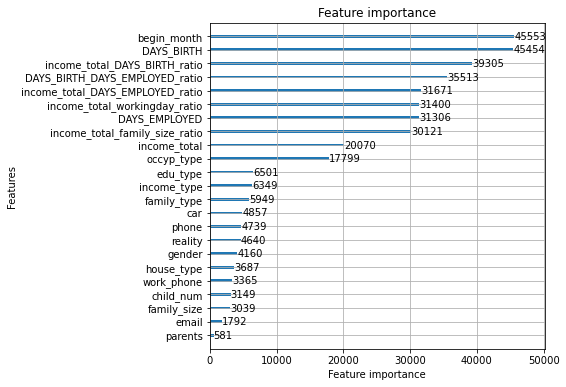

In [47]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(6, 6))
plot_importance(models['LGBM'], ax=ax)

In [35]:
pred_df = pd.DataFrame(data=pred_test_dic['LGBM'])
pred_df

sub = pd.read_csv('sample_submission.csv', index_col='index')
sub[sub.columns] = pred_df.values
sub.to_csv('submission0430_ratio.csv')

### Stacking
ref)https://dacon.io/codeshare/1828?dtype=recent

In [132]:
X_train7 , X_val3, y_train7, y_val3 = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
from sklearn.ensemble import StackingClassifier

clf1 = RandomForestClassifier()
clf2 = SVC(probability=True)
clf3 = LogisticRegression(multi_class = 'ovr')

In [143]:
clf = StackingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('lr', clf3)], #모델 합치기
    final_estimator=models['LGBM'], n_jobs = -1, stack_method = 'predict_proba', cv = 5)

In [144]:
clf = clf.fit(X_train7, y_train7)

In [145]:
y_pred_stack = clf.predict_proba(X_val3)

In [146]:
    print(f'\tCV Log Loss: {log_loss(y_val3, y_pred_stack):.6f}')

	CV Log Loss: 0.797139


In [22]:
pred_df = pd.DataFrame(data=y_pred_stack)
pred_df

,0,1,2
0,0.057444,0.096680,0.845876
1,0.359846,0.185873,0.454281
2,0.068424,0.103853,0.827724
3,0.046842,0.098206,0.854952
4,0.039791,0.113171,0.847038
...,...,...,...
9995,0.082736,0.222441,0.694823
9996,0.114122,0.554413,0.331465
9997,0.297213,0.145989,0.556797
9998,0.303982,0.284102,0.411916


In [33]:
sub = pd.read_csv('sample_submission.csv', index_col='index')
sub[sub.columns] = pred_df.values
sub.to_csv('submission0428_stacking.csv')